In [58]:
import pandas as pd

df = pd.read_csv("../result.CSV",encoding='cp949')

In [59]:
print(df.info())
df.head(-10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   날짜                85 non-null     object 
 1   일누적 자외선 A(MJ/m2)  85 non-null     float64
 2   일최대 자외선 B(W/m2 )  85 non-null     float64
 3   평균 오존전량(DU)       85 non-null     float64
 4   전운량(10분위)         85 non-null     int64  
 5   자외선지수             85 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.1+ KB
None


,날짜,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위),자외선지수
0,2020-06-01,1.196,0.200,-999.0,2,5
1,2020-06-02,0.426,0.114,-999.0,10,7
2,2020-06-03,0.802,0.160,-999.0,10,7
3,2020-06-04,0.658,0.110,-999.0,7,9
4,2020-06-05,0.924,0.173,325.0,7,9
...,...,...,...,...,...,...
70,2020-08-10,0.744,0.192,260.4,9,6
71,2020-08-11,0.449,0.143,293.8,10,6
72,2020-08-12,0.637,0.213,-999.0,9,4
73,2020-08-13,1.124,0.208,276.9,9,4


In [60]:
df = df.replace(-999, np.nan)
df = df.replace(999, np.nan)
df = df.fillna(  {'평균 오존전량(DU)': df['평균 오존전량(DU)'].mean(), '전운량(10분위)':df['전운량(10분위)'].mean() , '일누적 자외선 A(MJ/m2)': df['일누적 자외선 A(MJ/m2)'].mean(),'일최대 자외선 B(W/m2 )': df['일최대 자외선 B(W/m2 )'].mean()} )
df.head(-10)

,날짜,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위),자외선지수
0,2020-06-01,1.196,0.200,298.743243,2.0,5
1,2020-06-02,0.426,0.114,298.743243,10.0,7
2,2020-06-03,0.802,0.160,298.743243,10.0,7
3,2020-06-04,0.658,0.110,298.743243,7.0,9
4,2020-06-05,0.924,0.173,325.000000,7.0,9
...,...,...,...,...,...,...
70,2020-08-10,0.744,0.192,260.400000,9.0,6
71,2020-08-11,0.449,0.143,293.800000,10.0,6
72,2020-08-12,0.637,0.213,298.743243,9.0,4
73,2020-08-13,1.124,0.208,276.900000,9.0,4


<AxesSubplot:xlabel='자외선지수', ylabel='평균 오존전량(DU)'>

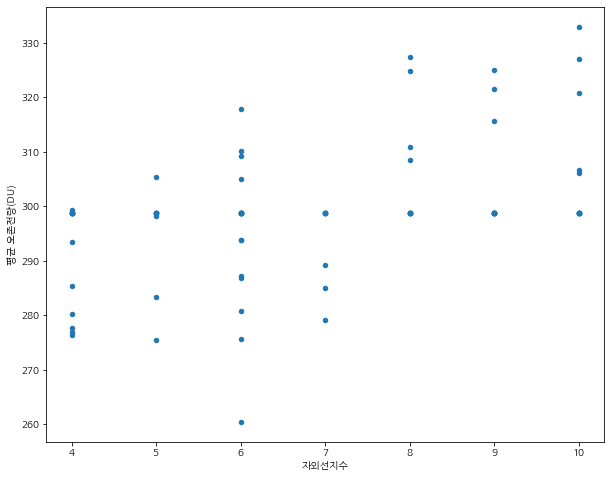

In [64]:
import matplotlib.pyplot as plot

df.plot(figsize=(10,8), kind='scatter',x= '자외선지수',y= '평균 오존전량(DU)' )
#plot.xlim([0, 0.3])

<AxesSubplot:xlabel='평균 오존전량(DU)'>

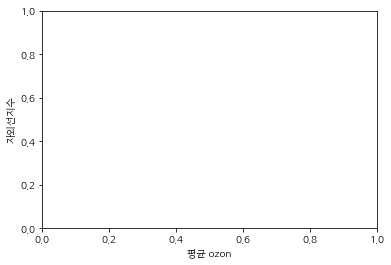

/home/sy/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


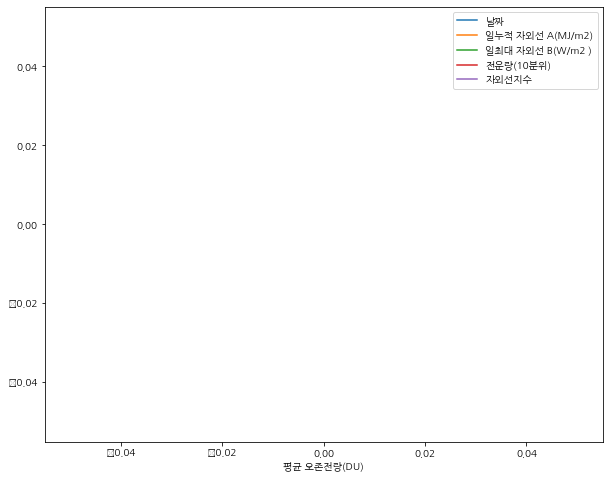

In [66]:
from sklearn.linear_model import LinearRegression

오존=df['평균 오존전량(DU)']
자외선지수=df['자외선지수']




x = df[['평균 오존전량(DU)']]
y = df[['자외선지수']]


#단순 회귀 모델 생성
model = LinearRegression()
model.fit(x, y)

#예측 모델 생성
y_p = model.predict(x)

df.plot(figsize=(10,8), kind='line',x= '평균 오존전량(DU)', y= x * model.coef_ + model.intercept_)
plt.ylabel('자외선지수')
plt.xlabel('평균 ozon')


